# Scripts

In [ ]:
#pip install matplotlib

In [ ]:
import pandas as pd
import re
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import minimize


In [ ]:
# read the data into pandas DataFrames

df_overhead = pd.read_csv(
    'overhead_data.txt',
    comment='#',
    sep=r'\s+',  
    names=['month', 'y_overhead_pct']
)

df_returns = pd.read_csv(
    'returns_data.txt',
    comment='#',
    sep=r'\s+', 
    names=['month', 'y_return_pct']
)

In [ ]:
# cast month to int
df_overhead['month'] = df_overhead['month'].astype(int)
df_returns['month'] = df_returns['month'].astype(int)

In [ ]:
print(df_overhead)

In [ ]:
plt.scatter(df_overhead['month'], df_overhead['y_overhead_pct'])
plt.xlabel('Overhead Month')
plt.ylabel('Overhead Percent')
plt.title('Overhead')
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(df_returns['month'], df_returns['y_return_pct'])
plt.xlabel('Month')
plt.ylabel('%')
plt.title('return')
plt.grid(True)
plt.show()

In [ ]:
x_returns = df_returns['month'].values
y_returns = df_returns['y_return_pct'].values

In [ ]:
def model_returns(theta, x):
    a, b, c = theta
    return a * x**2 + b * x + c

In [ ]:
def loss_mse(theta, x, y):
    y_pred = model_returns(theta, x)
    error = y_pred - y
    return np.mean(error**2)

In [ ]:
theta0_returns = np.array([0.1, 0.1, 0.1])


In [ ]:
res_returns = minimize(loss_mse, theta0_returns, args=(x_returns, y_returns))

print(res_returns)

In [ ]:
theta_fit_returns = res_returns.x
a, b, c = theta_fit_returns

print(theta_fit_returns)

In [ ]:
plt.figure(figsize=(10, 6))
xx = np.linspace(x_returns.min(), x_returns.max(), 100)
y_fit = model_returns(theta_fit_returns, xx)

In [ ]:
plt.scatter(x_returns, y_returns, label="Actual Returns Data")
plt.plot(xx, y_fit, label="Fitted Quadratic Model", color='red')
plt.xlabel("Month")
plt.ylabel("Return Pct")
plt.title("Step (e): Returns Data vs. Quadratic Model")
plt.legend()
plt.show()

# Optimization

In [35]:
def linear_returns_model(theta, x):
    b, c = theta
    return b * x + c

In [36]:
def loss_function(theta, x, y):
    y_pred = linear_returns_model(theta,x)
    error = y_pred - y  
    return np.mean(error**2)

In [37]:
theta0_linear = np.array([0.1, 0.1])

In [38]:
result_return = minimize(loss_function, theta0_linear, args=(x_returns, y_returns))
print(result_return)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.006803201062845136
        x: [ 2.545e-01  9.854e-01]
      nit: 3
      jac: [-2.037e-09  1.455e-09]
 hess_inv: [[ 1.043e-02 -1.304e-01]
            [-1.304e-01  2.130e+00]]
     nfev: 15
     njev: 5


In [44]:
theta_fit_returns = result_return.x
b, c = theta_fit_returns


In [ ]:
plt.figure(figsize=(10, 6))
xx = np.linspace(x_returns.min(), x_returns.max(), 100)
y_fit = linear_returns_model(theta_fit_returns, xx)

<Figure size 1000x600 with 0 Axes>

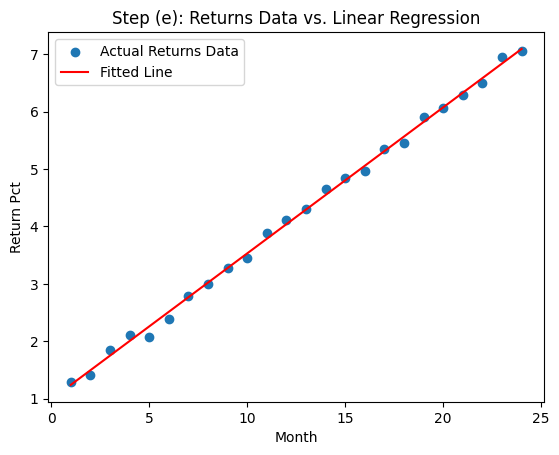

In [46]:
plt.scatter(x_returns, y_returns, label="Actual Returns Data")
plt.plot(xx, y_fit, label="Fitted Line", color='red')
plt.xlabel("Month")
plt.ylabel("Return Pct")
plt.title("Step (e): Returns Data vs. Linear Regression")
plt.legend()
plt.show()